# **DSL 25-1 기초 과제**

### 기수 : 13기
### 이름 : 양재화

In [ ]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

필수 라이브러리 갖고오기

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# **1-2**

표본 평균이 모평균에 수렴하는 과정을 시뮬레이션하세요.

이를 위해, 아래에 주어진 **cumulative_average** 함수를 작성해 보세요.

In [2]:
def cumulative_average(data):
    """
    Given a numpy array, compute the cumulative average.

    Inputs:
    - data: A numpy array of shape (N,)

    Returns:
    - cumulative_avg: A numpy array of shape (N,) containing the cumulative averages.
                      cumulative_avg[i] represents the average of data[:i+1].
    """
    N = len(data)
    cumulative_avg = np.zeros(N)
    #### TO DO ####
    # Hint: np.cumsum
    cum_sum = data.cumsum()
    for i in range(N):
        cumulative_avg[i] = cum_sum[i] / (i+1)
    
    ###############
    return cumulative_avg


$X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} N(3, 10^2)$인 데이터를 생성하고, **cumulative_average** 함수를 활용하여 큰 수의 약한 법칙(WLLN)을 시뮬레이션하세요. 

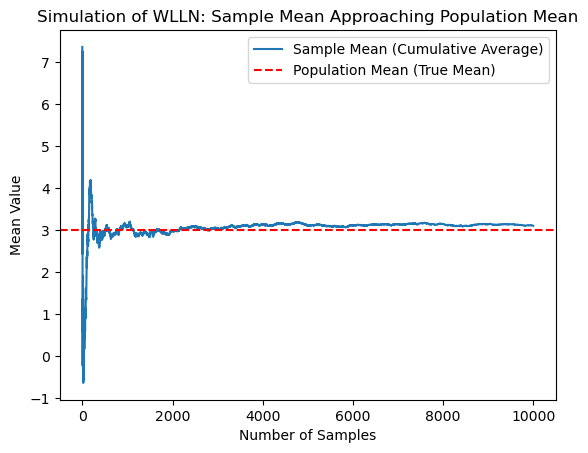

In [3]:
population_mean = 3
population_std = 10
sample_size = 10000

samples = np.random.normal(population_mean, population_std, size=sample_size)
cumulative_average_samples = cumulative_average(samples)

plt.plot(cumulative_average_samples, label="Sample Mean (Cumulative Average)")
plt.axhline(y=population_mean, color='r', linestyle='--', label="Population Mean (True Mean)")
plt.title("Simulation of WLLN: Sample Mean Approaching Population Mean")
plt.xlabel("Number of Samples")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


위의 예시에서는 $X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} N(3, 10^2)$ 를 이용해서 WLLN를 시뮬레이션해봤습니다.

이제는 정규분포 대신 n=50, p=0.1인 이항분포 $X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} B(50, 0.1)$를 이용해서 WLLN의 다른 형태를 시뮬레이션해보세요.

즉, 표본평균이 모평균에 수렴하는 과정이 아닌, **표본비율이 모비율에 수렴하는 과정**을 시뮬레이션해보세요.

(Hint: **np.random.binomial**과 **cumulative_average** 함수를 적절히 사용하세요!)

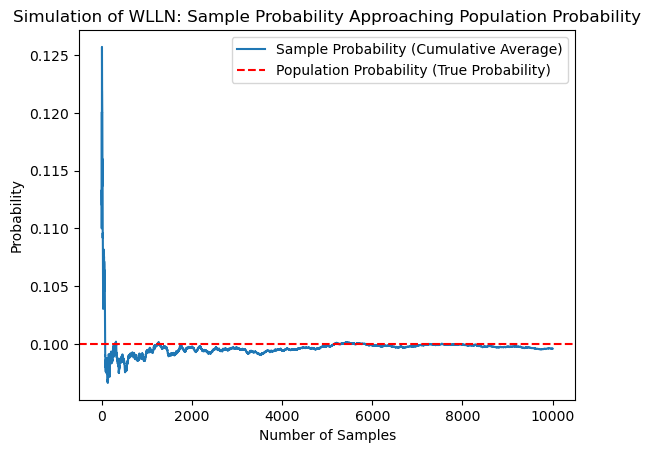

In [4]:
n = 50
population_prob = 0.1
sample_size = 10000

#### TO DO ####
cumulative_prob = None

sample = np.random.binomial(n, population_prob, sample_size)/n
cumulative_prob = cumulative_average(sample)


###############

plt.plot(cumulative_prob, label="Sample Probability (Cumulative Average)")
plt.axhline(y=population_prob, color='r', linestyle='--', label="Population Probability (True Probability)")
plt.title("Simulation of WLLN: Sample Probability Approaching Population Probability")
plt.xlabel("Number of Samples")
plt.ylabel("Probability")
plt.legend()
plt.show()


# **2-3**

표본 평균의 분포가 정규분포에 가까워지는 과정을 확인해보세요.

이를 위해, 아래에 주어진 **normalize_sample_means** 함수를 작성해 보세요.

In [5]:
def normalize_sample_means(samples, population_mean, population_std):
    """
    Computes the normalized values for the sample means based on the Central Limit Theorem (CLT).

    Parameters:
    - samples: A numpy array of shape (n_iter, n),
               where each row represents the data obtained from one sampling iteration.
    - population_mean: The mean (μ) of the population.
    - population_std: The standard deviation (σ) of the population.

    Returns:
    - normalized_values: A numpy array of shape (n_iter,) containing the normalized values of the sample means,
                         calculated as √n(X̄n - μ)/σ.
    """
    n_iter, n = samples.shape
    normalized_values = np.zeros(n_iter)
    #### TO DO ####
    for i in range(n_iter):
        sample_mean = np.mean(samples[i, :])
        normalized_values[i] = np.sqrt(n) * (sample_mean - population_mean) / population_std
        

    ###############
    return normalized_values


$X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} N(10, 5^2)$인 데이터를 n_iter번 생성하고, **normalize_sample_means** 함수를 활용하여 표본 평균의 분포와 표준 정규 분포를 비교해보세요.

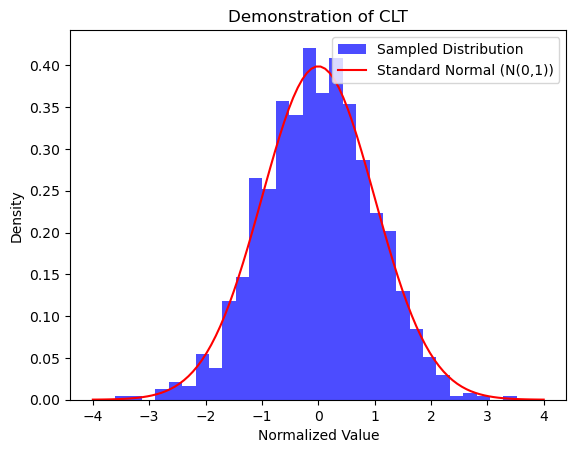

In [6]:
population_mean = 10
population_std = 5
n_iter = 1000
n = 10000

samples = np.random.normal(loc=population_mean, scale=population_std, size=(n_iter, n))
normalized_values = normalize_sample_means(samples, population_mean, population_std)

plt.hist(normalized_values, bins=30, density=True, alpha=0.7, color='blue', label="Sampled Distribution")
x = np.linspace(-4, 4, 100)
plt.plot(x, np.exp(-x**2 / 2) / np.sqrt(2 * np.pi), 'r-', label="Standard Normal (N(0,1))")
plt.title("Demonstration of CLT")
plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.show()


위의 예시에서는 $X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} N(10, 5^2)$ 를 이용해서 표본 평균의 분포와 정규 분포를 비교해봤습니다.

이제는 정규분포 대신 lambda=5인 포아송 분포 $X_1, X_2, \dots, X_n \stackrel{\text{i.i.d.}}{\sim} Pois(5)$를 이용해서 표본 평균의 분포와 표준 정규 분포를 비교해보세요.

(Hint: **np.random.poisson**)

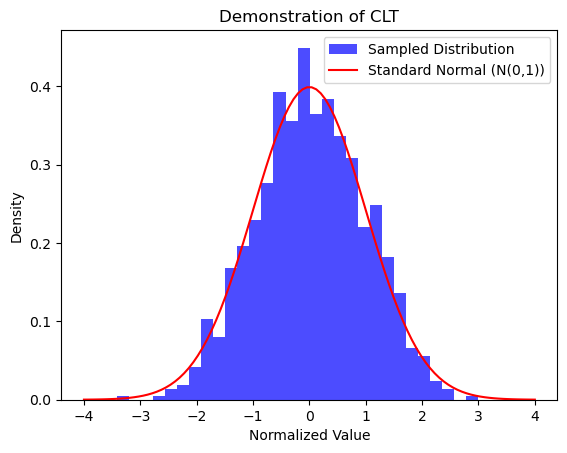

In [7]:
lambda_poisson = 5
n_iter = 1000
n = 10000

#### TO DO ####
samples = np.random.poisson(lambda_poisson, size = (n_iter, n))
normalized_values = normalize_sample_means(samples, population_mean = 5, population_std = np.sqrt(5))

###############

plt.hist(normalized_values, bins=30, density=True, alpha=0.7, color='blue', label="Sampled Distribution")
x = np.linspace(-4, 4, 100)
plt.plot(x, np.exp(-x**2 / 2) / np.sqrt(2 * np.pi), 'r-', label="Standard Normal (N(0,1))")
plt.title("Demonstration of CLT")
plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.show()


# **4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정 및 파일 불러오기

In [8]:
# 만약 안되면 절대경로로 바꿔주세요!
path_to_csv = os.path.join(os.getcwd(), 'data', 'heights.csv')
data = pd.read_csv(path_to_csv)

전처리

In [9]:
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [10]:
DSL.head()

,heights,which
0,181.8,DSL
1,161.3,DSL
2,177.8,DSL
3,169.1,DSL
4,181.2,DSL


ESC 데이터 형태

In [12]:
ESC.head()

,heights,which
78,171.1,ESC
79,159.2,ESC
80,184.9,ESC
81,176.1,ESC
82,184.8,ESC


Else 데이터 형태

In [11]:
Else.head()

,heights,which
141,180.6,Else
142,169.3,Else
143,176.0,Else
144,180.3,Else
145,177.7,Else


In [17]:
#### TO DO ####
# Hint: scipy.stats.f_oneway
statistic, p_value = stats.f_oneway(DSL['heights'], ESC['heights'])
p_value < 0.05
###############

True

#### 결론

one-way ANOVA test는 모든 모집단의 평균이 같음을 귀무가설로 하고, 그 반대의 경우를 대립가설로 한다. 따라서, 문제에서 수립한 대립가설은 ANOVA test에서의 귀무가설과 같다. 따라서, anova test에서 p-value가 0.05 이상이라면 ANOVA test의 귀무가설이 기각되므로 문제 상황에서의 대립가설이 기각, 귀무가설이 채택되는 것과 같다.

위에서 볼 수 있듯이, p-value가 0.05이므로 문제에서의 귀무가설이 채택된다. 따라서, 두 집단 간의 평균 키는 다르다고 할 수 있다.

# **5-A NumPy**

### **5-A-1 Feature Scaling**

- **Feature Scaling**이란?
  
    **Feature Scaling**은 데이터셋의 독립 변수 또는 특성(feature)의 범위를 정규화(normalize)하는 데 사용되는 기법이다.

- 왜 **Feature Scaling**이 필요한가?
  
    1) feature들 간의 magnitude나 단위가 매우 다를 수 있다. 그래서 머신러닝 알고리즘의 objective function이 제대로 작동하지 않을 수 있다. 예를 들어, 흔히 objective function으로 유클리디안 거리를 사용하는데, 범위가 넓은 feature가 거리에 큰 영향을 미칠 수 있다. 따라서 모든 feature들이 동일하게 영향을 미치게 하기 위해 '정규화'를 해야 한다.
    2) 경험적으로, (stochastic) gradient descent의 수렴 속도가 빨라진다.

- **Feature Scaling**의 종류들
  
    Min-Max Scaling, Standardization(Z-score Normalization), Robust Scaling 등이 있다.

(출처: https://en.wikipedia.org/wiki/Feature_scaling)

**Min-Max Scaling**은 feature의 범위를 [0, 1]로 rescaling하는 방법으로, 변환식은 다음과 같습니다.
$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

**<h2>TO-DO</h2>**

**Min-Max Scaling**을 numpy로 직접 구현한 뒤, **sklearn.preprocessing.MinMaxScaler**를 사용한 결과와 비교해 보세요.

(참고: https://scikit-learn.org/stable/modules/preprocessing.html)

In [63]:
def minmax_scaling_np(X):
    """
    Scales the input data X to the range [0, 1] using Min-Max Scaling.

    Parameters:
    - X: A numpy array of shape (N, F), where N is the number of samples and F is the number of features.
         Assume X_max > X_min for every feature

    Returns:
    - X_scaled: A numpy array of shape (N, F), with each feature scaled to the range [0, 1].
    """
    X_scaled = X.copy()
    #### TO DO ####
    X_min, X_max = X.min(axis = 0), X.max(axis = 0)
    scale = X_max - X_min

    X_scaled = (X - X_min) / scale
     
    ###############
    return X_scaled


In [64]:
X = np.array([[200, 3, 90, 300, 10],
              [500, 10, 50, 250, 15],
              [700, 4, 70, 400, 20],
              [100, 6, 80, 350, 15],
              [300, 7, 20, 200, 30]])

X_scaled_np = minmax_scaling_np(X)
scaler = MinMaxScaler()
X_scaled_sklearn = scaler.fit_transform(X)

print("Min-Max Scaling (numpy):\n", X_scaled_np)
print("\nMin-Max Scaling (sklearn):\n", X_scaled_sklearn)

assert np.allclose(X_scaled_np, X_scaled_sklearn), "Results do not match!"
print("\nResults match between numpy and sklearn implementations!")


Min-Max Scaling (numpy):
 [[0.16666667 0.         1.         0.5        0.        ]
 [0.66666667 1.         0.42857143 0.25       0.25      ]
 [1.         0.14285714 0.71428571 1.         0.5       ]
 [0.         0.42857143 0.85714286 0.75       0.25      ]
 [0.33333333 0.57142857 0.         0.         1.        ]]

Min-Max Scaling (sklearn):
 [[0.16666667 0.         1.         0.5        0.        ]
 [0.66666667 1.         0.42857143 0.25       0.25      ]
 [1.         0.14285714 0.71428571 1.         0.5       ]
 [0.         0.42857143 0.85714286 0.75       0.25      ]
 [0.33333333 0.57142857 0.         0.         1.        ]]

Results match between numpy and sklearn implementations!


### **5-A-2 Cosine Similarity**

- **Cosine Similarity**란?
  
    **Cosine Similarity**은 두 벡터 사이의 유사도를 측정하는 척도 중 하나이다. 유클리디안 내적 공식을 통해 유도되며, 식은 다음과 같다.
    $$
    \text{cosine\_similarity}(A, B) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
    $$

- **Cosine Similarity**이 어디에 활용되는가?

    1) 정보 검색 및 추천 시스템: 검색 쿼리와 문서 간의 유사도를 계산하여, 유사도가 높은 문서를 사용자에게 추천한다.
    2) 텍스트 마이닝 및 자연어 처리(NLP): TF-IDF 벡터로 표현된 문서 간의 유사도를 계산해 주제나 내용이 비슷한 문서를 비교할 수 있다.
    3) 데이터 클러스터링: 데이터 포인트 간의 유사성을 측정하여, 이를 바탕으로 클러스터를 형성할 수 있다.

(출처: https://en.wikipedia.org/wiki/Cosine_similarity)

**<h2>TO-DO</h2>**

**Cosine Similarity**을 numpy로 직접 구현한 뒤, **sklearn.metrics.pairwise.cosine_similarity**를 사용한 결과와 비교해 보세요.

(참고: https://scikit-learn.org/stable/modules/metrics.html)

In [35]:
def cosine_similarity_np(X, Y=None):
    """
    Computes the cosine similarity between samples in X and Y.

    Parameters:
    - X: A numpy array of shape (n_samples_X, n_features).
    - Y: A numpy array of shape (n_samples_Y, n_features), or None.
         If None, compute pairwise similarities within X.

    Returns:
    - similarities: A numpy array of shape (n_samples_X, n_samples_Y) containing cosine similarities.
                    similarities[i, j] is the cosine similarity between X[i] and Y[j] if Y is provided,
                    or between X[i] and X[j] if Y is None.
    """
    if Y is None:
        Y = X  # If Y is not provided, compare X with itself
    similarities = np.zeros((X.shape[0], Y.shape[0]))
    #### TO DO ####
    # Hint 1: np.linalg.norm
    # Hint 2: If broadcasting does not work properly, try reshape or keepdims=True

    similarities = np.divide(X @ Y.T, np.linalg.norm(X, axis = 1, keepdims = 1) @ np.linalg.norm(Y, axis = 1, keepdims = 1).T)
    
    ###############
    return similarities


In [26]:
X = np.random.randn(2,3)
Y = np.random.randn(4,3)

X @ Y.T


array([[ 1.24691273,  1.55407727,  0.20737046, -1.5187556 ],
       [ 0.81988026,  1.37839586, -0.67672026,  0.45722783]])

In [36]:
X = np.array([[1, 2, 3], [4, 2, 6]])
Y = np.array([[1, 0, 0], [0, 1, 0], [3, 5, 2], [2, 0, 1]])

cos_sim_np = cosine_similarity_np(X, Y)
cos_sim_sklearn = cosine_similarity(X, Y)

print("Cosine Similarity (numpy):\n", cos_sim_np)
print("\nCosine Similarity (sklearn):\n", cos_sim_sklearn)

assert np.allclose(cos_sim_np, cos_sim_sklearn), "Results do not match!"
print("\nResults match between numpy and sklearn implementations!")


Cosine Similarity (numpy):
 [[0.26726124 0.53452248 0.82375447 0.5976143 ]
 [0.53452248 0.26726124 0.73704347 0.83666003]]

Cosine Similarity (sklearn):
 [[0.26726124 0.53452248 0.82375447 0.5976143 ]
 [0.53452248 0.26726124 0.73704347 0.83666003]]

Results match between numpy and sklearn implementations!


# **5-B Pandas** (+matplotlib.pyplot)

titanic.csv 경로 설정 및 파일 불러오기

In [48]:
# 만약 안되면 절대경로로 바꿔주세요!
path_to_csv = os.path.join(os.getcwd(), 'data', 'titanic.csv')
df = pd.read_csv(path_to_csv)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **5-B-1**

dataframe에서 각 열에 존재하는 결측치(null)의 개수를 확인하고, 데이터의 기본 통계 요약 정보를 출력하세요.

In [51]:
#### TO DO ####
# 1) 결측치 개수 확인
# 2) 기본 통계 요약 출력

print(df.isnull().sum().sum())
df.describe()
###############

866


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **5-B-2**

**Cabin** 열에는 대부분의 값들이 결측치이며, **Embarked** 열에는 몇 개의 결측치들이 존재하는 것을 확인해 볼 수 있습니다.

**Cabin** 열을 삭제한 뒤, **Embarked** 열에서 결측치가 있는 행을 제거하고 이를 새로운 dataframe(**df_new**)으로 저장하세요.

In [53]:
#### TO DO ####
# 1) Cabin 열 제거
# 2) Embarked 열에서 결측치가 있는 행 제거
# 3) 1,2의 과정을 새로운 dataframe(df_new)에 저장
df = df.drop(['Cabin'], axis = 1)
df.dropna(subset = ['Embarked'], axis = 0)

df_new = df
###############
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### **5-B-3**

#### 이제부터는 **df_new**로 진행됩니다!

승객들의 **Name**은 쉼표(,)로 나누어져 있으며, 쉼표 이전의 문자열은 Surname(성)입니다.

쉼표 이전의 문자열을 **Surname**이라는 새로운 열로 dataframe에 추가해주고, dataframe의 첫 3개 행을 출력하세요.

In [59]:
#### TO DO ####
# Surname 열 생성 후, 첫 3개 행 출력
df[['Surname', 'Given_name']] = df['Name'].str.split(',', expand = True)
print(df.iloc[:, :3])
###############

     PassengerId  Survived  Pclass
0              1         0       3
1              2         1       1
2              3         1       3
3              4         1       1
4              5         0       3
..           ...       ...     ...
886          887         0       2
887          888         1       1
888          889         0       3
889          890         1       1
890          891         0       3

[891 rows x 3 columns]


### **5-B-4**

**Fare** 열은 승객이 지불한 요금입니다. 이 데이터를 히스토그램으로 시각화하여 승객들이 지불한 요금의 분포를 확인하세요.

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

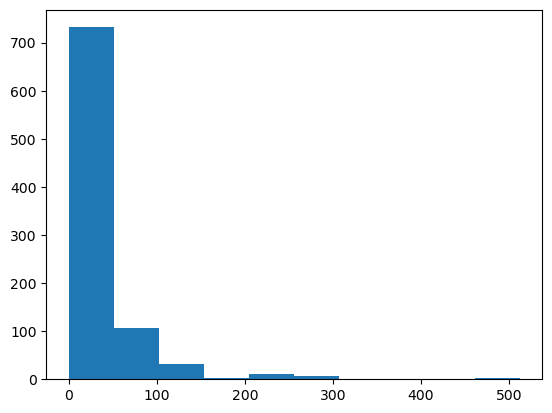

In [63]:
#### TO DO ####
# Fare 분포 시각화
Fare = df['Fare']

plt.hist(Fare)
###############

### **5-B-5**

**Pclass** 열은 승객의 티켓 등급을 나타내며, **Fare**와 밀접한 관련이 있을 것으로 보입니다.

각 **Pclass**별 **Fare**의 통계치를 확인한 뒤, 이를 박스플롯(boxplot)으로 시각화하세요.

        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


<Figure size 1000x800 with 0 Axes>

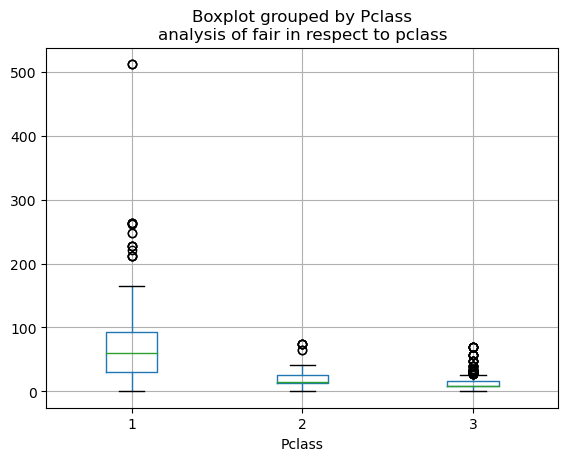

In [72]:
#### TO DO ####
# 1) Pclass 별 Fare 요약 통계치 확인
# 2) Pclass 별 Fare를 boxplot으로 시각화
data = df_new[['Pclass', 'Fare']]

stats = df.groupby('Pclass')['Fare'].describe()
print(stats)

plt.figure(figsize = (10,8))
df.boxplot(column = 'Fare', by = 'Pclass')
plt.title('analysis of fair in respect to pclass')
plt.show()
###############

In [85]:
statistics = df.groupby('Pclass')['Fare'].mean(), df.groupby('Pclass')['Fare'].std(), df.groupby('Pclass')['Fare'].count()
statistics

(Pclass
 1    84.154687
 2    20.662183
 3    13.675550
 Name: Fare, dtype: float64,
 Pclass
 1    78.380373
 2    13.417399
 3    11.778142
 Name: Fare, dtype: float64,
 Pclass
 1    216
 2    184
 3    491
 Name: Fare, dtype: int64)

Q. **Pclass**와 **Fare**이 서로 관련이 있어 보이나요? 그 이유를 간략히 설명해 보세요.

A. 위의 통계치를 보게 되면, 세 분포 중 임의로 두 분포를 골라도 유의확률 1%에서 평균이 서로 다른 검정 결과가 나오게 된다. 따라서, 세 Pclass에 속한 Fare의 분포는 모두 독립적이므로 Fare은 Pclass에 따라 분포가 다른 것이 확실하다, 즉 연관되어 있다.

### **5-B-6**

**Survived** 열은 생존 여부를 나타내며, 값이 1이면 생존을 의미합니다.

**Pclass**별 생존자 비율을 계산해보세요.

In [83]:
#### TO DO ####
# Pclass 별 생존자 비율 계산
Surv_Pclass = df_new[['Survived', 'Pclass']]
statistic = df.groupby('Pclass')['Survived'].mean()
std = df.groupby('Pclass')['Survived'].std()
num = df.groupby('Pclass')['Survived'].count()
statistic = statistic * 100
statistic, std, num
###############

(Pclass
 1    62.962963
 2    47.282609
 3    24.236253
 Name: Survived, dtype: float64,
 Pclass
 1    0.484026
 2    0.500623
 3    0.428949
 Name: Survived, dtype: float64,
 Pclass
 1    216
 2    184
 3    491
 Name: Survived, dtype: int64)

Q. **Pclass**가 생존 여부와 관련이 있어 보이나요? 그 이유를 간략히 설명해 보세요.

A.Pclass에 따른 각 분포를 살펴보고, 3개의 분포 중 2가지를 골라 아무 것이나 두 분포가 평균이 같다는 귀무가설 하에에 검정하면 유의확률 1% 내에서 귀무가설을 기각할 수 있다. 모든 분포가 높은 확률로 독립적이므로, Pclass와 생존 여부는 관련이 있는 것으로 결론내릴 수 있다.

### **5-B-7**

생존 여부와 관련이 있을 가능성이 있는 변수 중 하나로 성별(**Sex**)을 고려해볼 수 있습니다.

**Sex**별 생존자 비율과, **Sex**과 **Pclass**의 조합에 따른 생존자 비율을 계산해보세요.

In [96]:
#### TO DO ####
# 1) Sex 별 생존자 비율 계산
# 2) Sex와 Pclass의 조합에 따른 생존자 비율 계산

stats = df.groupby('Sex')['Survived'].mean()
print(stats)

newstats = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(newstats)
###############

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


Q. 이 결과를 통해 도출할 수 있는 내용을 간략히 서술하세요.

A. 먼저, Sex와 Pclass가 독립된 feature인지 검정해볼 수 있다. 두 가지 집단에 대하여 카이제곱 검정을 해보면 두 집단이 독립이라는 귀무가설을 기각할 수 없으므로 성별과 Pclass는 독립적인 feature이라는 것을 알 수 있다.